# M3-L2 Problem 2 (6 points)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression


# One-vs-All (One-vs-Rest) Multinomial Classification

## Load Dataset
#### (Don't edit this)
- (x,y) values are stored in rows of `xy`
- class values are in `c`

In [30]:
x = np.array([7.4881350392732475,16.351893663724194,22.427633760716436,29.04883182996897,35.03654799338904,44.45894113066656,6.375872112626925,18.117730007820796,26.036627605010292,27.434415188257777,38.71725038082664,43.28894919752904,7.680445610939323,18.45596638292661,17.110360581978867,24.47129299701541,31.002183974403255,46.32619845547938,9.781567509498505,17.90012148246819,26.186183422327638,31.59158564216724,35.41479362252932,45.805291762864556,3.182744258689332,15.599210213275237,17.833532874090462,33.04668917049584,36.018483217500716,42.146619399905234,4.64555612104627,16.942336894342166,20.961503322165484,29.284339488686488,30.98789800436355,44.17635497075877,])
y = np.array([0.11120957227224215,0.1116933996874757,0.14437480785146242,0.11818202991034835,0.0859507900573786,0.09370319537993416,0.2797631195927265,0.216022547162927,0.27667667154456677,0.27706378696181594,0.2310382561073841,0.22289262976548535,0.40154283509241845,0.4063710770942623,0.427019677041788,0.41386015134623205,0.46883738380592266,0.38020448107480287,0.5508876756094834,0.5461309517884996,0.5953108325465398,0.5553291602539782,0.5766310772856306,0.5544425592001603,0.705896958364552,0.7010375141164304,0.7556329589465274,0.7038182951348614,0.7096582361680054,0.7268725170660963,0.9320993229847936,0.8597101275793062,0.9337944907498804,0.8596098407893963,0.9476459465013396,0.8968651201647702,])
xy = np.vstack([x,y]).T
c = np.array([0,2,2,2,2,2,0,2,2,2,2,2,0,0,2,0,1,2,0,0,1,1,1,2,0,1,0,1,1,1,0,0,1,1,1,1,])

## Binomial classification function

You are given a function that performs binomial classification by using sklearn's `LogisticRegression` tool:
`prob = get_ovr_prob_function(xy, c, A)`

To use it, input:
- `xy`, an array in which each row contains (x,y) coordinates of data points
- `c`, an array that specifies the class each point in `xy` belongs to
- `A`, the class of the group (0, 1, or 2 in this problem) -- classifies into A or "rest"

The function outputs a probability function (`prob()` in this case), used to determine the probability that each `xy` is class A or [not A], such as by using `prob(xy)`.

In [31]:
def get_ovr_prob_function(xy, c, A):
    c_new = (c == A).astype(int)
    
    model = LogisticRegression()
    model.fit(xy,c_new)

    def prob(xy):
        pred = model.predict_proba(xy)[:,1]
        return pred.flatten()
    
    return prob


## Coding an OvR classifier

Now you will create a one-vs-rest classifier to do multinomial classification. Binomial predictions will be made for each class vs. the rest of the classes. The class whose binomial prediction gives the highest probability is the selected class.

Complete the two functions we have started:
- `generate_ovr_prob_functions(xy, c)` which returns a list of binary classifier probability functions for all possible classes (0, 1, and 2 in this problem)
- `classify_ovr(probs, xy)` which loops through a list of ovr classifier probabilities and gets the probability of belonging to each class, for each point in `xy`. Then taking the highest probability for each, return the overall class predictions for each point.


In [32]:
def generate_ovr_prob_functions(xy, c):
    # YOUR CODE GOES HERE
    classify0 = get_ovr_prob_function(xy, c, 0)
    classify1 = get_ovr_prob_function(xy, c, 1)
    classify2 = get_ovr_prob_function(xy, c, 2)
    
    probs = np.array([classify0,classify1,classify2])
    return probs



def classify_ovr(probs, xy):
    # YOUR CODE GOES HERE

    preds = np.array([])
    n = xy.shape[0]
    for i in probs:
        preds = np.append(preds,np.array([i(xy)]))   
        # print(np.array([i(xy)]))
    preds = preds.reshape(3,n)
    print(preds.T)
    
    final_preds = np.zeros(n)
    
    for i in range(preds.shape[1]):
        max_index = np.where(preds[:,i] == np.max(preds[:,i]))
        match max_index:
            case 0:
                final_preds[i] = 0 
            case 1:
                final_preds[i] = 1
            case 2:
                final_preds[i] = 2

    return final_preds


### Trying out our multinomial classifier:

In [33]:
probs = generate_ovr_prob_functions(xy, c)
preds = classify_ovr(probs, xy)
accuracy = np.sum(preds == c) / len(c) * 100
print("True Classes:", c)
print(" Predictions:", preds)
print("    Accuracy:", accuracy, r"%")

[[9.44377327e-01 6.04608510e-02 2.40191467e-01]
 [5.67689037e-01 1.03762444e-01 3.69286440e-01]
 [1.86783178e-01 1.55401898e-01 4.54650451e-01]
 [3.25468452e-02 2.13499497e-01 5.83032838e-01]
 [5.86988679e-03 2.75217815e-01 6.94479367e-01]
 [3.89444756e-04 4.18137640e-01 8.11667244e-01]
 [9.61217337e-01 7.58052398e-02 1.69503911e-01]
 [4.49629158e-01 1.36631730e-01 3.46345939e-01]
 [7.81006462e-02 2.30430261e-01 4.46918193e-01]
 [5.35572788e-02 2.47370466e-01 4.70883567e-01]
 [2.13788459e-03 3.88739281e-01 6.83000715e-01]
 [5.70304607e-04 4.58730458e-01 7.50901698e-01]
 [9.46583706e-01 1.01016353e-01 1.46989302e-01]
 [4.41428035e-01 1.87846106e-01 2.65381650e-01]
 [5.39966781e-01 1.80295421e-01 2.39392250e-01]
 [1.22396020e-01 2.58827580e-01 3.50874846e-01]
 [2.10970873e-02 3.73582879e-01 4.31008382e-01]
 [2.50305435e-04 5.81906620e-01 7.26899391e-01]
 [9.10403390e-01 1.45940835e-01 1.26631405e-01]
 [4.93122590e-01 2.24673139e-01 2.04982833e-01]
 [8.28912878e-02 3.54754240e-01 2.924853

### Plotting multnomial classifier results

Here, we have made some plotting functions -- run these cells to visualize the decision boundaries.

In [34]:
def plot_data(x, y, c, title="Phase of simulated material", newfig=True):
    xlim = [0,52.5]
    ylim = [0,1.05]
    markers = [dict(marker="o", color="royalblue"), dict(marker="s", color="crimson"), dict(marker="^", color="limegreen")]
    labels = ["Solid", "Liquid", "Vapor"]

    if newfig:
        plt.figure(dpi=150)

    for i in range(1+max(c)):
        plt.scatter(x[c==i], y[c==i], s=60, **(markers[i]), edgecolor="black", linewidths=0.4,label=labels[i])

    plt.title(title)
    plt.legend(loc="upper right")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Temperature, K")
    plt.ylabel("Pressure, atm")
    plt.box(True)

def plot_ovr_colors(probs, res=40):
    xlim = [0,52.5]
    ylim = [0,1.05]
    xvals = np.linspace(*xlim,res)
    yvals = np.linspace(*ylim,res)
    x,y = np.meshgrid(xvals,yvals)
    XY = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)

    color = classify_ovr(probs,XY).reshape(res,res)

    cmap = ListedColormap(["lightblue","lightcoral","palegreen"])
    plt.pcolor(x, y, color, shading="nearest", zorder=-1, cmap=cmap,vmin=0,vmax=2)
    return


[[9.93012938e-01 3.08461589e-02 1.92220607e-01]
 [9.89727327e-01 3.36226006e-02 2.07200721e-01]
 [9.84920145e-01 3.66395001e-02 2.23025938e-01]
 ...
 [1.14928751e-04 8.60267656e-01 4.47865567e-01]
 [7.79141839e-05 8.70633311e-01 4.71148276e-01]
 [5.28200961e-05 8.80336980e-01 4.94557204e-01]]


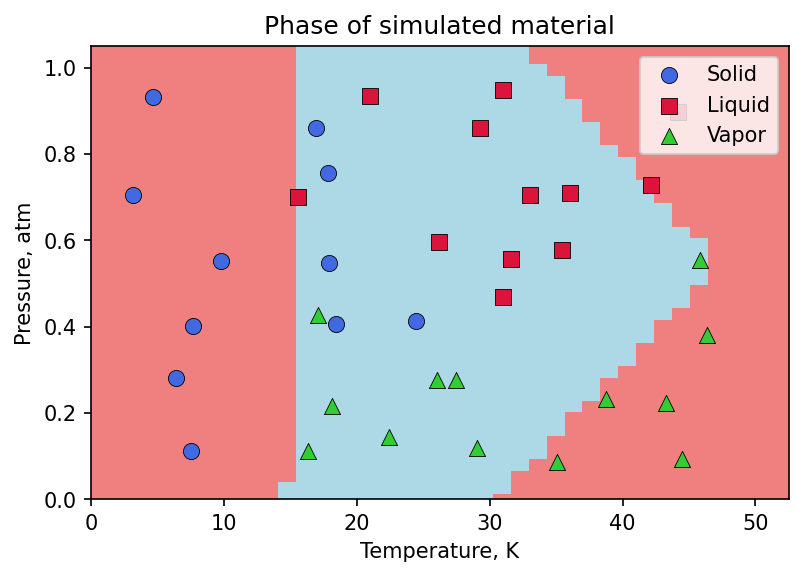

In [35]:
plot_data(x,y,c)
plot_ovr_colors(probs)
plt.show()